In [85]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

In [44]:
predictions_df = pd.read_parquet('6_rolling_predictions_t_competitor_median_rate.parquet')

In [48]:
predictions_df.head()
reference_date = datetime.datetime(2023, 12, 30)

In [49]:
compset_data_report_date = predictions_df[predictions_df['report_date'] == str(reference_date)]

In [67]:
future_compset_data = compset_data_report_date[compset_data_report_date['future_report_date'] > reference_date]
future_compset_data_sorted = future_compset_data.sort_values('future_report_date')
future_compset_data_extracted = future_compset_data_sorted[['future_report_date', 'stay_date', 'pred']]
future_compset_data_extracted = future_compset_data_extracted.rename(columns={'pred': 'median_rate'})
future_compset_data_extracted.head()

,future_report_date,stay_date,median_rate
10269273,2023-12-31,2023-12-31,356.973724
10326002,2023-12-31,2024-02-16,174.805161
10691425,2023-12-31,2024-05-30,252.145767
10696237,2023-12-31,2024-05-31,286.988586
10324082,2023-12-31,2024-02-15,162.053406


In [68]:
past_compset_data = predictions_df[predictions_df['future_report_date'] < reference_date]
past_compset_data_sorted = past_compset_data.sort_values('future_report_date')
past_compset_data_extracted = past_compset_data_sorted[['future_report_date', 'stay_date', 'actual']]
past_compset_data_extracted = past_compset_data_extracted.rename(columns={'actual': 'median_rate'})
past_compset_data_extracted.head()

,future_report_date,stay_date,median_rate
0,2022-02-02,2022-02-02,165.5
33166,2022-02-02,2022-04-04,142.0
205884,2022-02-02,2022-06-16,204.5
209286,2022-02-02,2022-06-17,204.0
31836,2022-02-02,2022-04-03,123.5


In [69]:
combined_compset_data = pd.concat([past_compset_data_extracted, future_compset_data_extracted], ignore_index=True)

# Sort the combined dataframe by future_report_date and stay_date
combined_compset_data_sorted = combined_compset_data.sort_values(['future_report_date', 'stay_date'])

# Display the first few rows of the combined dataframe
combined_compset_data_sorted.head()

,future_report_date,stay_date,median_rate
0,2022-02-02,2022-02-02,165.5
163,2022-02-02,2022-02-03,155.5
169,2022-02-02,2022-02-04,148.0
160,2022-02-02,2022-02-05,177.5
139,2022-02-02,2022-02-06,124.0


In [72]:
# Merge duplicate entries and take average of median_rate
combined_compset_data_merged = combined_compset_data_sorted.groupby(['future_report_date', 'stay_date'], as_index=False)['median_rate'].mean()

# Sort the merged dataframe
combined_compset_data_merged = combined_compset_data_merged.sort_values(['future_report_date', 'stay_date'])

# Display the first few rows of the merged dataframe
print(combined_compset_data_merged.head())

  future_report_date  stay_date  median_rate
0         2022-02-02 2022-02-02        165.5
1         2022-02-02 2022-02-03        155.5
2         2022-02-02 2022-02-04        148.0
3         2022-02-02 2022-02-05        177.5
4         2022-02-02 2022-02-06        124.0


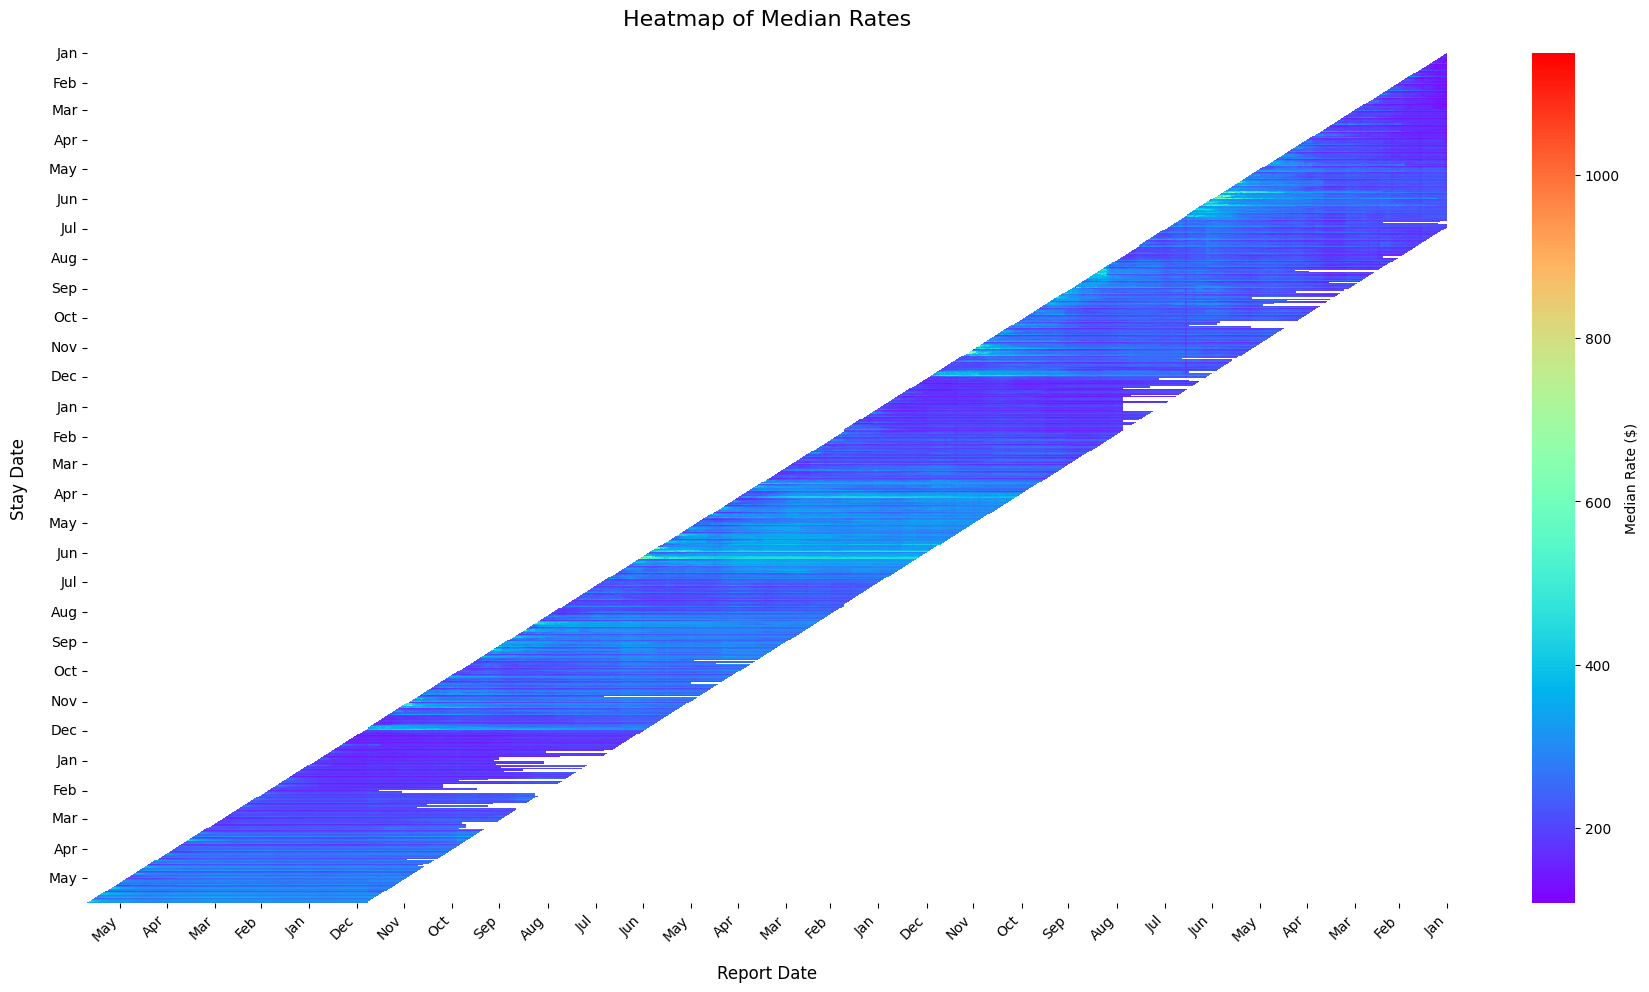

In [87]:
# Assuming combined_compset_data_merged is your DataFrame
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = combined_compset_data_merged.pivot(index='stay_date', columns='future_report_date', values='median_rate')

# Convert index and columns to datetime if they aren't already
heatmap_data.index = pd.to_datetime(heatmap_data.index)
heatmap_data.columns = pd.to_datetime(heatmap_data.columns)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Create the heatmap
sns.heatmap(heatmap_data,
            cmap='rainbow',  # A perceptually uniform colormap
            vmin=combined_compset_data_merged['median_rate'].min(),
            vmax=combined_compset_data_merged['median_rate'].max(),
            cbar_kws={'label': 'Median Rate ($)', 'orientation': 'vertical'},
            ax=ax)


# Reverse the x-axis
ax.invert_xaxis()

# Set the title and labels
ax.set_title('Heatmap of Median Rates', fontsize=16, pad=20)
ax.set_xlabel('Report Date', fontsize=12, labelpad=15)
ax.set_ylabel('Stay Date', fontsize=12, labelpad=15)

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Format y-axis
ax.yaxis.set_major_locator(mdates.MonthLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0, ha='right')

# Use a tight layout and adjust to prevent cutting off labels
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

# Show the plot
plt.show()

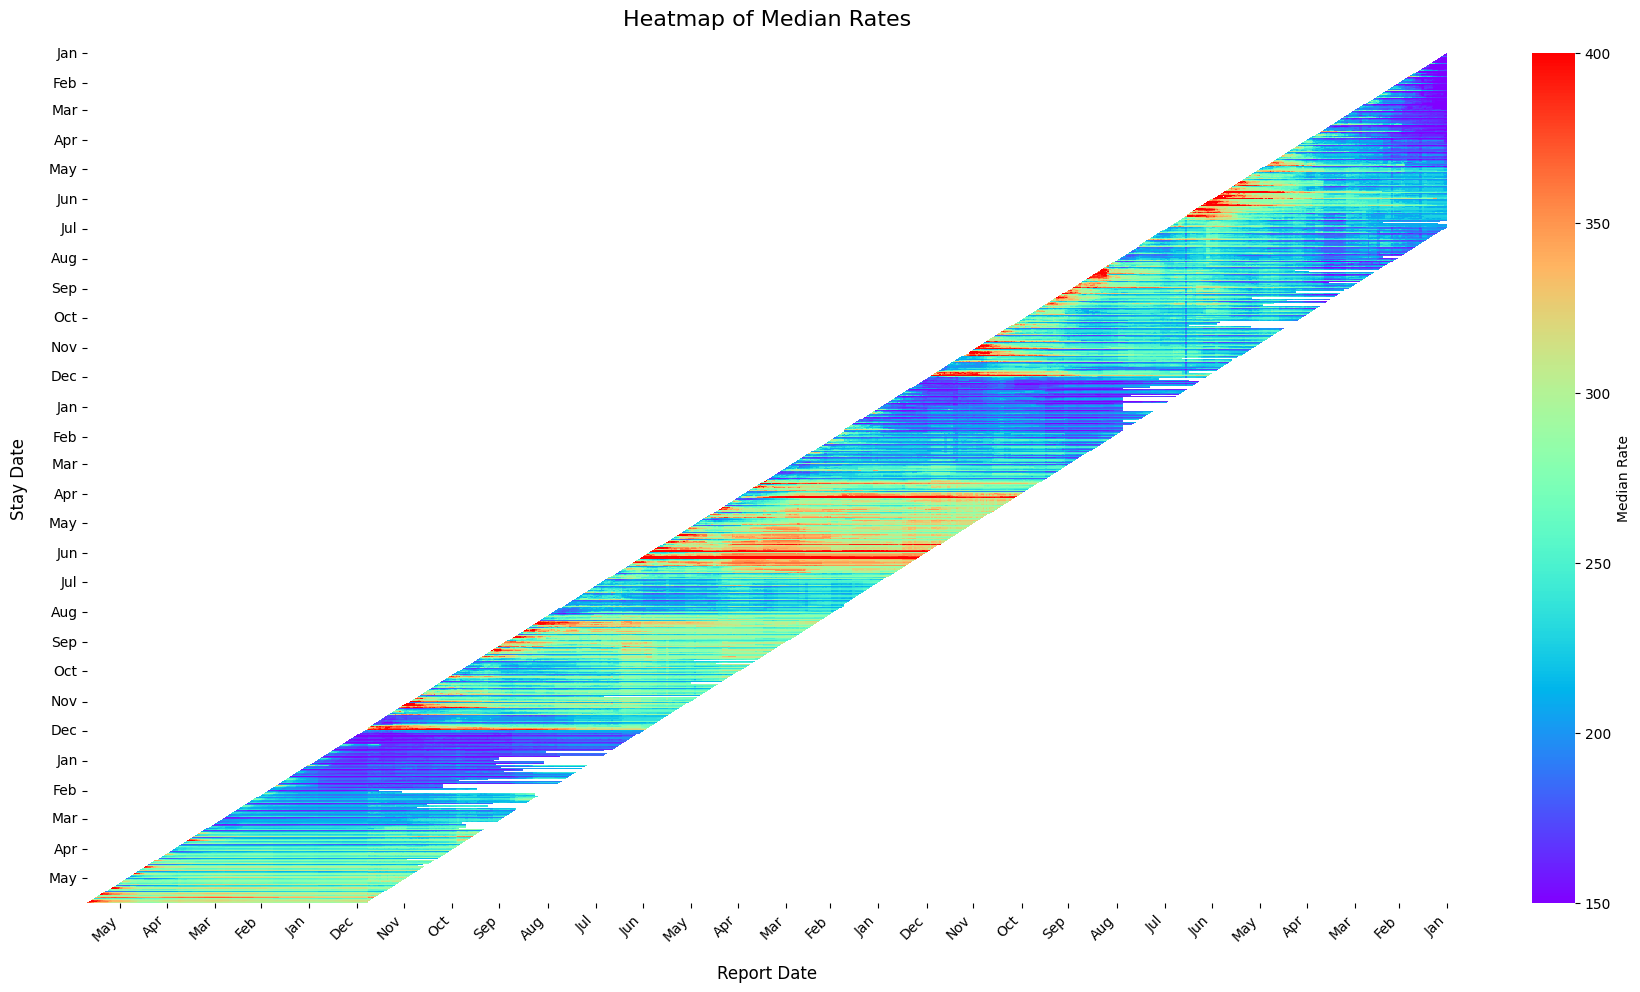

In [98]:
# Assuming combined_compset_data_merged is your DataFrame
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = combined_compset_data_merged.pivot(index='stay_date', columns='future_report_date', values='median_rate')

# Convert index and columns to datetime if they aren't already
heatmap_data.index = pd.to_datetime(heatmap_data.index)
heatmap_data.columns = pd.to_datetime(heatmap_data.columns)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

ax.axvline(x=reference_date, color='black', linestyle='--', linewidth=2, zorder=6)

# Create the heatmap with rescaled color map
sns.heatmap(heatmap_data,
            cmap='rainbow',
            vmin=150,
            vmax=400,
            cbar_kws={'label': 'Median Rate', 'orientation': 'vertical'},
            ax=ax,
            norm=plt.Normalize(150, 400))

# Reverse the x-axis
ax.invert_xaxis()

# Set the title and labels
ax.set_title('Heatmap of Median Rates', fontsize=16, pad=20)
ax.set_xlabel('Report Date', fontsize=12, labelpad=15)
ax.set_ylabel('Stay Date', fontsize=12, labelpad=15)

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Format y-axis
ax.yaxis.set_major_locator(mdates.MonthLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.get_yticklabels(), rotation=0, ha='right')

# Use a tight layout and adjust to prevent cutting off labels
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)


# Show the plot
plt.show()